In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
gold_data = pd.read_csv('dataset/gold_price.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [6]:
correlations = gold_data.corr()

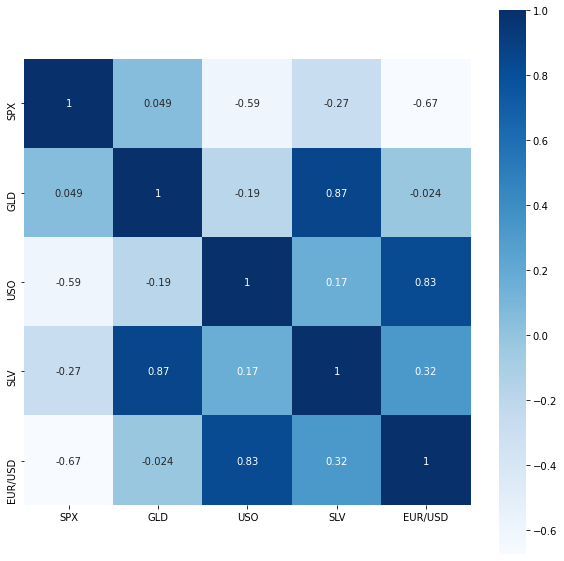

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlations, cbar=True, square=True, annot=True, annot_kws={'size':10}, cmap = 'Blues')



In [10]:
print(correlations['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


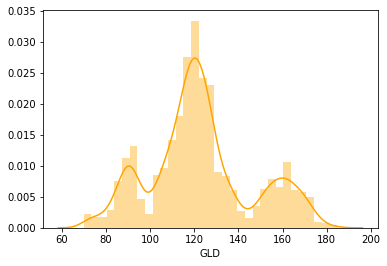

In [12]:
sns.distplot(gold_data['GLD'], color='orange')


In [13]:
x = gold_data.drop(['Date', 'GLD'], axis=1)
y = gold_data['GLD']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)


In [16]:
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [17]:
training_pred = model.predict(x_train)
testing_pred = model.predict(x_test)

re_train = metrics.r2_score(y_train, training_pred)
re_test = metrics.r2_score(y_test, testing_pred)

print('R^2 Error (Training): ', re_train)
print('R^2 Error (Testing): ', re_test)

R^2 Error (Training):  0.99827715592931
R^2 Error (Testing):  0.9896629942987966


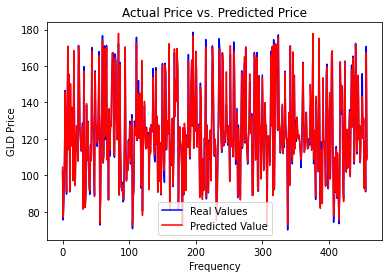

In [18]:
y_test = list(y_test)

plt.plot(y_test, color='blue', label='Real Values')
plt.plot(testing_pred, color='red', label='Predicted Value')
plt.title('Actual Price vs. Predicted Price')
plt.xlabel('Frequency')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [19]:
#We can assume now that the model performs well due to the values being very close and the R^2 Error being low for both the training and testing.
